# Exploratory data analysis of telco customer data

In [1]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading data to dataframe
df = pd.read_csv('Telco Customer Churn.csv')

In [3]:
# Checking for null values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- No missing / null value found

In [4]:
# Gathering info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- The dataset contains data of 7043 customers.
- TotalCharges column contains numeric values but its data type is object. We shall convert it to numeric.

In [5]:
# Converting data type of 'TotalCharges' column to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ''

- Could not convert data type to float. Empty strings (' ') are present which can't be converted to float. 

In [6]:
# Counting the no. of empty string values
count = 0
for i in df['TotalCharges']:
    if i ==' ':
        count+=1
print(count)

11


- There are 11 out of 7043 rows where a value is missing. As it is a small number we can remove these rows as there will not be any major impact on the analysis.

In [7]:
# Dropping rows containing empty strings
df = df.replace(' ', pd.NA).dropna()

In [8]:
# Converting data type of 'TotalCharges' column to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

- TotalCharges has been converted to float type.

In [10]:
# Checking for duplicate data
df.duplicated().sum()

0

- No duplicate row found.

In [11]:
# Displaying first 10 rows of dataframe to know more about the dataset
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


- We can drop 'customerID' and 'TotalCharges' columns as these don't seem to serve any purpose in analysis.

In [12]:
# Dropping customerID and TotalCharges columns
df = df.drop(['customerID','TotalCharges'], axis=1)

In [13]:
# Description of data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208
std,0.368844,24.545260,30.085974
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.587500
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.862500
max,1.000000,72.000000,118.750000


- 16.2% of all customers are senior citizens. (SeniorCitizen column must be converted from numerical to categorical)
- Average tenure of a customer is 32.4 months and max tenure is 72 months.
- Average monthly charge paid by customers is ```$64.76```. Min paid charge is ```$18.25``` while max is ```$118.75```.

In [14]:
# Converting data type of 'SeniorCitizen' column from numeric to textual data
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes', 0:'No'})

## Outlier Detection:
Outliers are the data points which are located unusually far from rest of the data.

### For categorical data:
Outliers in categorical data are the categories which have very few datapoints.


In [15]:
Numerical_data = ['tenure', 'MonthlyCharges']
Categorical_data = [x for x in df if x not in Numerical_data]

In [16]:
# Exploring categories in categorical data to find outliers
for i in df:
    if i in Categorical_data:
        print(df[i].value_counts())
        print('--------------------------------')

gender
Male      3549
Female    3483
Name: count, dtype: int64
--------------------------------
SeniorCitizen
No     5890
Yes    1142
Name: count, dtype: int64
--------------------------------
Partner
No     3639
Yes    3393
Name: count, dtype: int64
--------------------------------
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
--------------------------------
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
--------------------------------
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
--------------------------------
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
--------------------------------
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
--------------------------------
OnlineBackup
No                     3087
Yes                    2425
No internet serv

- From above data we can see that all the categories in each variable consists of considerable number of customers. No category can be considered as an outlier.

### For numerical data:
Outliers can be detected using scatterplot, boxplot, etc. We are using boxplot here.

In [17]:
# Description of data
df.describe()

,tenure,MonthlyCharges
count,7032.000000,7032.000000
mean,32.421786,64.798208
std,24.545260,30.085974
min,1.000000,18.250000
25%,9.000000,35.587500
50%,29.000000,70.350000
75%,55.000000,89.862500
max,72.000000,118.750000


- From the info above an outlier would be a datapoint that is either smaller than Q$_1$ - 1.5 * IQR or greater than Q$_3$ + 1.5 * IQR.
- For tenure, an outlier would be a value < - 60 or > 124
- For MonthlyCharges, an outlier would be a value < - 45.96 or > 171.4
* Q$_1$ = 25 %
* Q$_3$ = 75 %
* IQR(Interquartile range) = Q$_3$ - Q$_1$

<Axes: >

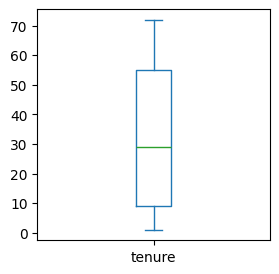

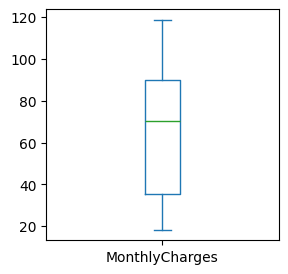

In [18]:
# Plotting numerical data to find outliers
df.plot.box(column='tenure', figsize=(3,3))
df.plot.box(column='MonthlyCharges', figsize=(3,3))

- From the plots above we can see that no data points can be considered as outliers.
- So no outliers are present in the dataset.

## Finding relationship between churn rate and various variables

- Churn rate is an important factor an organization should focus on as it is directly related to customer satisfaction and revenue generation.
- Churn rate = (No. of customers who have churned * 100) / Total no. customers
- The column 'Churn' here tells us about the customers who have not renewed their contracts.

<Axes: title={'center': 'Churn vs Non-churn customers'}>

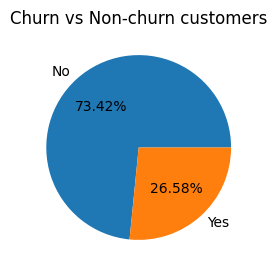

In [19]:
df['Churn'].value_counts().plot.pie(autopct = '%1.2f%%', title = 'Churn vs Non-churn customers',label = '', figsize=(3,3))


- Overall churn rate is 26.58 which is quite high.

### Churn rate vs customer information

<Axes: xlabel='gender', ylabel='count'>

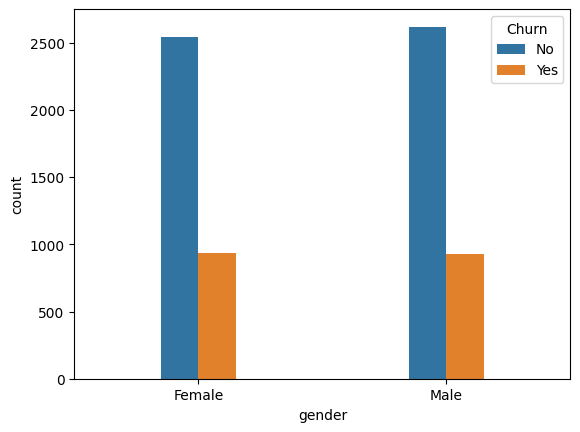

In [20]:
# Finding churn wrt gender
sns.countplot(df, x = 'gender', hue = 'Churn', width = 0.3)

- Number of males and females is almost equal. Churn rate of both the genders is also almost equal.

<Axes: xlabel='SeniorCitizen', ylabel='count'>

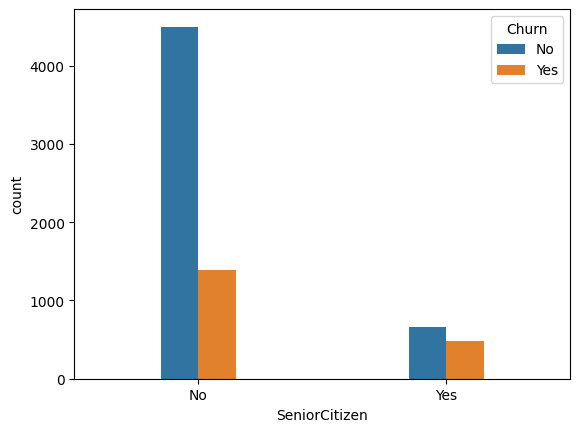

In [21]:
# Finding churn wrt SeniorCitizen
sns.countplot(df, x = 'SeniorCitizen', hue = 'Churn', width = 0.3)

- Most of the customers' age is less than 60 and they tend to churn more than senior citizens.

<Axes: xlabel='Partner', ylabel='count'>

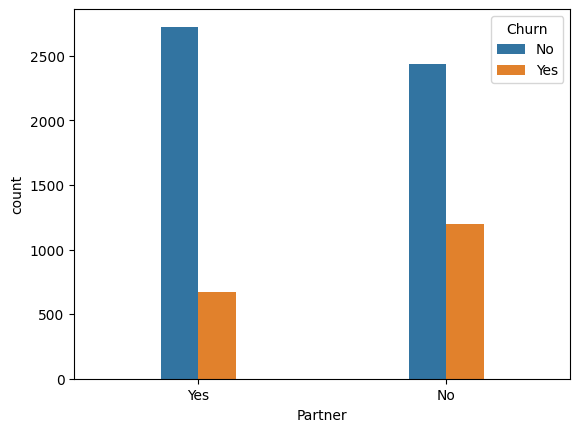

In [22]:
# Finding churn wrt partner
sns.countplot(df, x = 'Partner', hue = 'Churn', width = 0.3)

- Churn rate is quite high among cusomers who don't have partners.

<Axes: xlabel='Dependents', ylabel='count'>

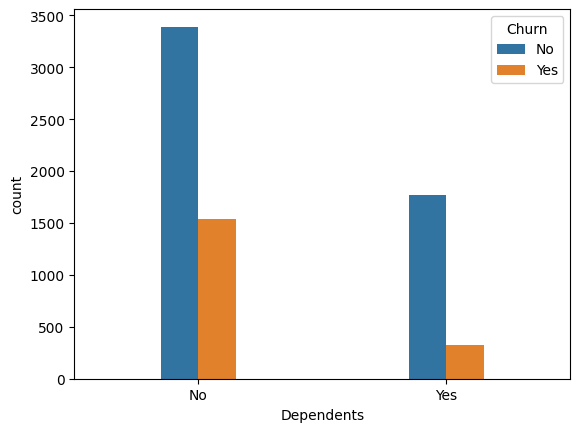

In [23]:
# Finding churn wrt dependents
sns.countplot(df, x = 'Dependents', hue = 'Churn', width = 0.3)

- Churn rate is quite high among cusomers who don't have dependents.

From the above plots we can see that:
- Gender is not playing any role in churn rate.
- While customers who are of age < 60 or customers who don't have partners or dependents tend to churn more.

### Sevices vs Churn rate

<Axes: xlabel='PhoneService', ylabel='count'>

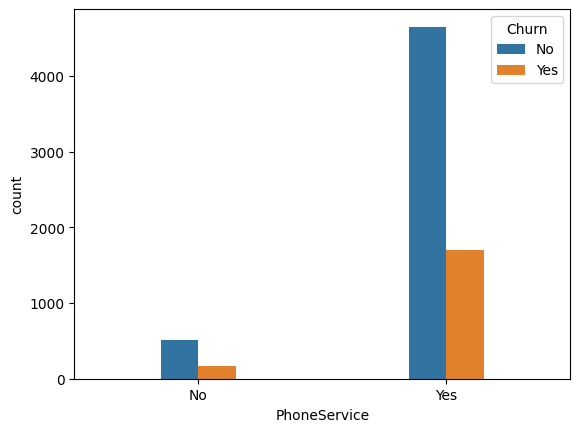

In [24]:
# Finding churn wrt PhoneService
sns.countplot(df, x = 'PhoneService', hue = 'Churn', width = 0.3)

- Churn rate of customers who don't have phone service is very low. But that is because very less customers are there who have not opted for phone service.

<Axes: xlabel='MultipleLines', ylabel='count'>

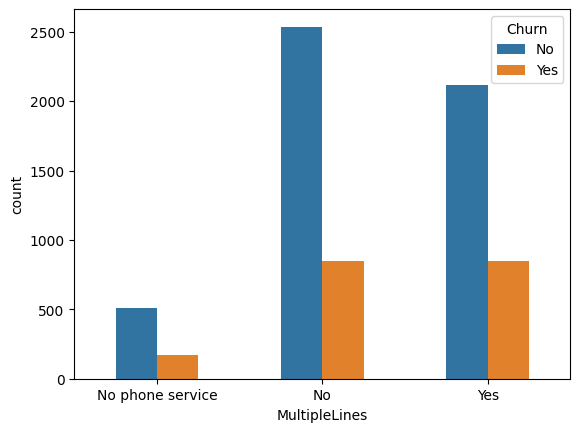

In [25]:
# Finding churn wrt MultipleLines
sns.countplot(df, x = 'MultipleLines', hue = 'Churn', width = 0.5)

<Axes: xlabel='InternetService', ylabel='count'>

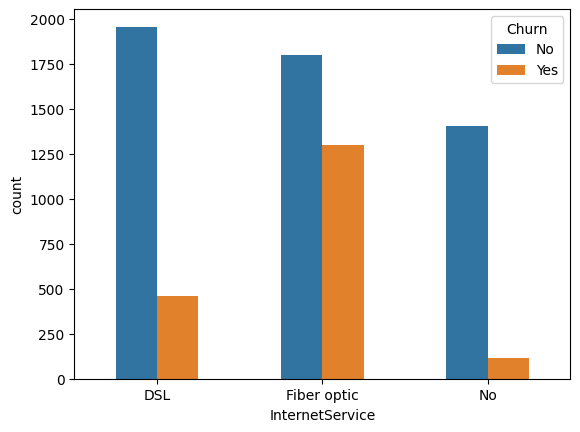

In [26]:
# Finding churn wrt InternetService
sns.countplot(df, x = 'InternetService', hue = 'Churn', width = 0.5)

- Customers having fiber optic connection have very high churn rate than others.

<Axes: xlabel='StreamingTV', ylabel='count'>

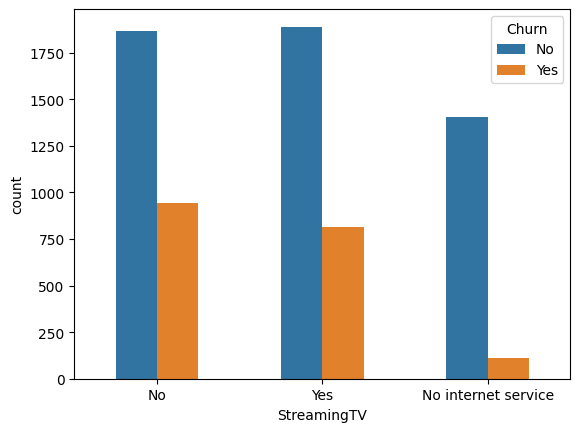

In [27]:
# Finding churn wrt StreamingTV
sns.countplot(df, x = 'StreamingTV', hue = 'Churn', width = 0.5)

<Axes: xlabel='StreamingMovies', ylabel='count'>

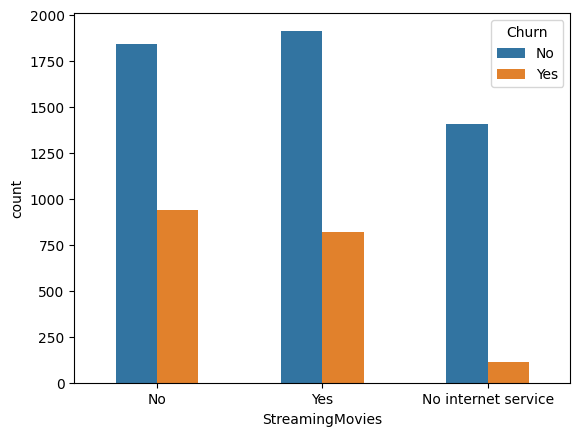

In [28]:
# Finding churn wrt StreamingMovies
sns.countplot(df, x = 'StreamingMovies', hue = 'Churn', width = 0.5)

### Support services vs Churn

<Axes: xlabel='OnlineSecurity', ylabel='count'>

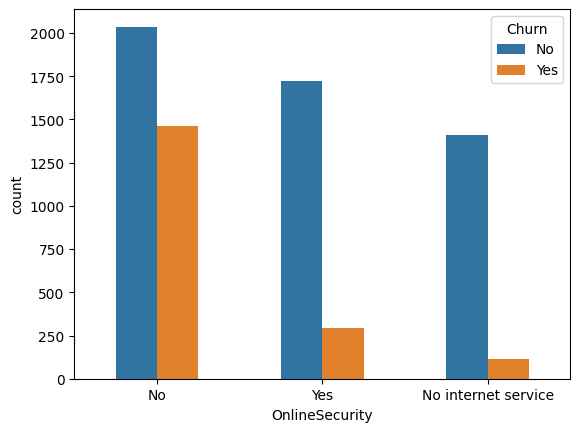

In [29]:
# Finding churn wrt OnlineSecurity
sns.countplot(df, x = 'OnlineSecurity', hue = 'Churn', width = 0.5)

<Axes: xlabel='OnlineBackup', ylabel='count'>

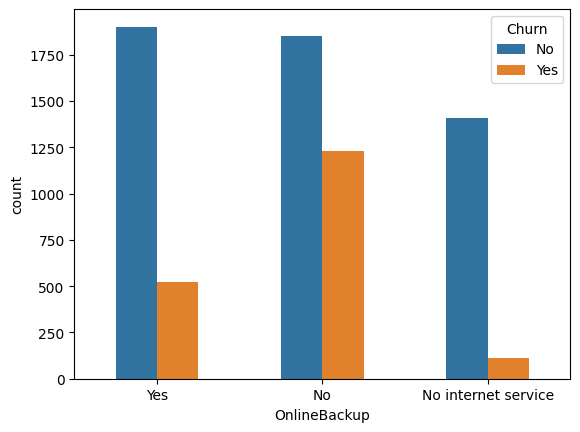

In [30]:
# Finding churn wrt OnlineBackup
sns.countplot(df, x = 'OnlineBackup', hue = 'Churn', width = 0.5)

<Axes: xlabel='DeviceProtection', ylabel='count'>

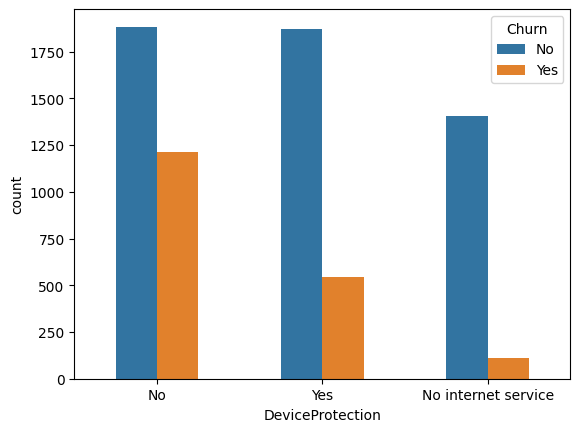

In [31]:
# Finding churn wrt DeviceProtection
sns.countplot(df, x = 'DeviceProtection', hue = 'Churn', width = 0.5)

<Axes: xlabel='TechSupport', ylabel='count'>

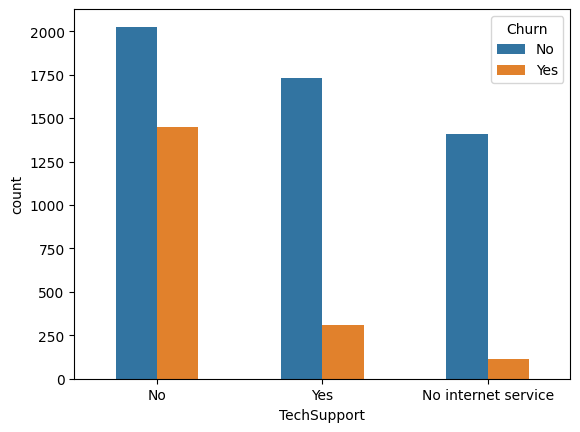

In [32]:
# Finding churn wrt TechSupport
sns.countplot(df, x = 'TechSupport', hue = 'Churn', width = 0.5)

- It is clear from above charts that churn rate of customers who have not opted for support services is much more than who have opted for the support services.

### Payment Details vs Churn

<Axes: xlabel='Contract', ylabel='count'>

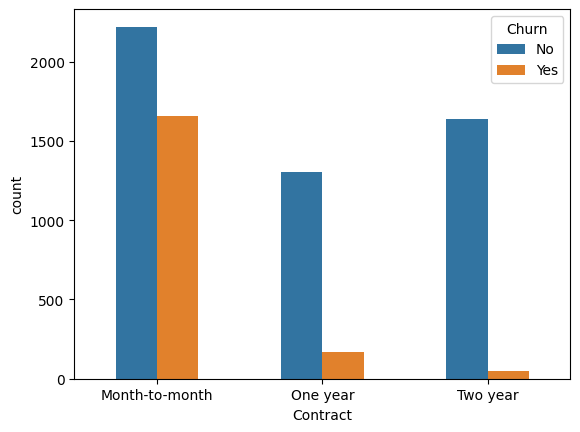

In [33]:
# Finding churn wrt Contract
sns.countplot(df, x = 'Contract', hue = 'Churn', width = 0.5)

<Axes: xlabel='PaperlessBilling', ylabel='count'>

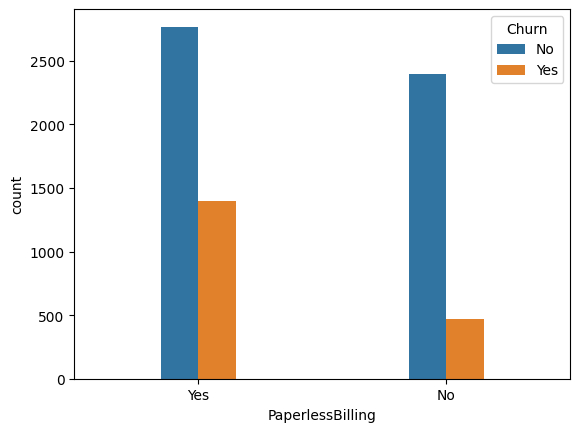

In [34]:
# Finding churn wrt PaperlessBilling
sns.countplot(df, x = 'PaperlessBilling', hue = 'Churn', width = 0.3)

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

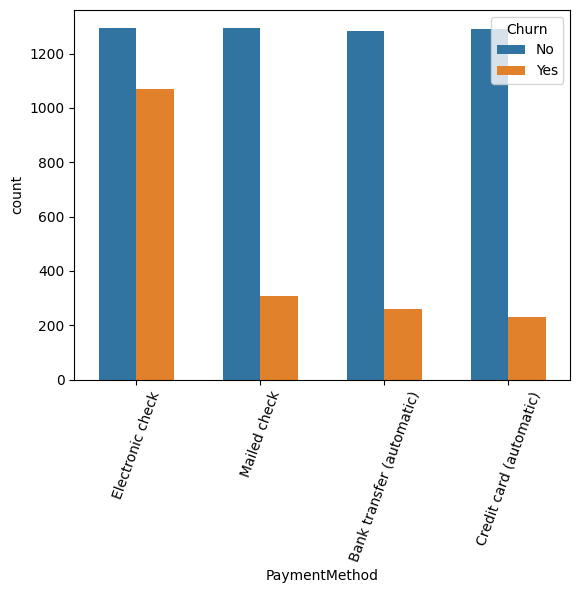

In [35]:
# Finding churn wrt PaymentMethod
sns.countplot(df, x = 'PaymentMethod', hue = 'Churn', width = 0.6)

plt.xticks(rotation=70)

- Customers who buy month-to-month contract tend to churn more.
- Churn rate of customers who opt for paperless billing is very high.
- Churn rate of customers who prefer electronic check is higher than others.

### Numeric Columns vs Churn

In [ ]:
# Distribution of tenure wrt churn
sns.kdeplot(df, x = 'tenure', hue = 'Churn', fill = True)

- Customers are more likely to churn within 20 months.

In [ ]:
# Distribution of contract wrt tenure
sns.kdeplot(df, x = 'tenure', hue = 'Contract', fill = True)

- New customers are more likely to buy monthly contract while those having tenure higher than 60 months tend to buy two-year contract.

In [ ]:
# Distribution of MonthlyCharges wrt churn
sns.kdeplot(df, x = 'MonthlyCharges', hue = 'Churn', fill = True)

- Customers with high monthly charges are more likely to churn than those with cheaper plans.

In [ ]:
# Distribution of contract wrt monthly charges
sns.kdeplot(df, x = 'MonthlyCharges', hue = 'Contract', fill = True)

- Huge number of people with monthly contract are having high monthly charges.

In [ ]:
# Distribution of tenure vs monthly charges wrt churn
sns.kdeplot(df, x = 'tenure', y = 'MonthlyCharges', hue = 'Churn', fill = True)

- From the plots above, we can see that most of the new customers buy monthly contracts with high monthly charges. And customers with monthly contract or high monthly charges are more likely to churn.